### ***1. 关联规则中的支持度、置信度和提升度代表的什么，如何计算? ***

- 支持度：是个百分比，指的是某个商品组合出现的次数与总次数之间的比例。支持度越高，代表这个组合出现的频率越大。
    - 比如，在这五笔订单中，显卡出现了四次，那么显卡在这个订单类别中的支持度（显卡）= 4/5 = 0.8
- 置信度：是个条件概念指的是当购买商品A，会有多大的概率购买商品B。
    - 比如，计算商品显卡(A)，对商品显示器(B)的置信度（显卡->显示器）。在这个订单列表中，显卡出现的了四次，而在显卡出现的这四次订单中，显示器出现了两次，那么 置信度（显卡->显示器） = 2/4 = 0.5
- 提升度：商品A的出现，对商品B的出现概率提升的程度。提升度(A->B) = 置信度（A->B）/支持度（B）
    - 提升度有三种可能：
        - 提升度(A->B)>1: 代表有提升；
        - 提升度(A->B)=1：代表既没有提升，也没有下降；
        - 提升度(A->B)<1: 代表有下降。
    - 比如，计算商品显卡（A）对商品显示器（B）的提升度。
        - 由以上例子已知 置信度（显卡->显示器）= 0.5；
        - 商品显示器在订单列表中出现了两次，那么支持度（显示器）= 2/5 = 0.4;
        - 那么提升度（显卡->显示器）= 置信度（显卡->显示器）/ 支持度（显示器） = 0.5/0.4 = 1.25 > 1，代表有提升。

| 订单编号 | 订单商品 |
|:-----:|:------:|
|  1 | 鼠标，键盘，显卡|
|  2 | 笔记本，显卡，CPU，显示器 |
|  3 | 漫画书，显示器，鼠标，显卡 |
|  4 | 笔记本，CPU，电子书，文件夹|
|  5 | 显卡，电子书，键盘 | 

*** Table1. 购物清单 ***

### ***2. 关联规则与协同过滤的区别?***

关联规则与协同过滤的区别主要体现在以下方面：
1. 关联规则注重整体上的关系分析，而协同过滤注重局部的关系分析；
2. 关联规则面向的分析对象是transcations，而协同规律面向的分析对象是用户对商品的交互行为包括：购买，评分，收藏，评论等；
3. 协同过滤的过程是先协同，找到相似的人，再过滤，注重个性化的场景；而关联规则直接从数据中挖掘潜在的关联，与个人偏好无关。
4. 基于关联规则的商品推荐是一种围绕用户动态行为的推荐而非用户类型的推荐，即会根据用户在某一段时间内的购买行为推荐相应的商品，而不关心用户是谁，有哪些偏好等。

### ***3. 为什么我们需要多种推荐算法? ***

总的来说，不同的推荐算法有其适用的场景和解决的问题，同时也各自有各自的缺陷；应用多种推荐系统可以使得算法之间可以取长补短，提高整体推荐表现。
比如：基于协同过滤的推荐算法，经常会遇到冷启动，数据稀疏性以及灰羊效应（用户类别不明显）等问题；那么采用关联规则的推荐作为协同过滤算法的补充就可以有效得缓解这些问题。

### ***4. 关联规则中的最小支持度、最小置信度该如何确定? ***

1. 商品的支持度与商品在所有订单数据中出现的次数以及订单总数有关；所以当订单总数非常大，而且商品的种类非常丰富时，单个商品的平均支持度会相对较小。
2. 而置信度则与条件商品的出现次数以及当前商品与条件商品的共现关系有关；所以当条件商品出现的次数非常多，且与多种商品有共现关系时，通常以此商品为条件商品的商品的置信度相对较低。
基于以上规律，我们可以根据当前应用中订单总数，商品总数等指标；设置一个经验上的相对较小的最小支持度和最小置信度；然后根据算法返回的结果和信息总数，来调节最小支持度和最小置信度的阈值。

### ***5. 如果通过可视化的方式探索特征之间的相关性? ***

对特征之间的可视化探索，依据数据类型组合的不同，可大致分为以下三种可视化类别。下面以波士顿房产数据来举例说明：

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('./data/houseprice.csv')
features = ['LotFrontage', 'LotArea','SaleCondition', 'SalePrice', 'HouseStyle', 'PavedDrive']
data = df[features]
data = data.dropna().reset_index(drop=True)

***1. 离散变量与离散变量之间的关系 - 热力图，柱状图 ***

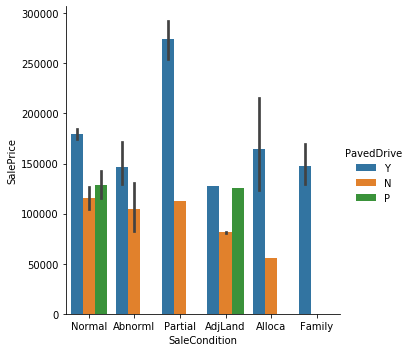

In [49]:
# 探索 SaleCondition 与 PavedDrive 之间的关系

# 柱状图
sns.catplot(x='SaleCondition', y='SalePrice', hue='PavedDrive', kind='bar', data=data)

***2. 离散变量与连续变量 - 箱体图，小提琴图***

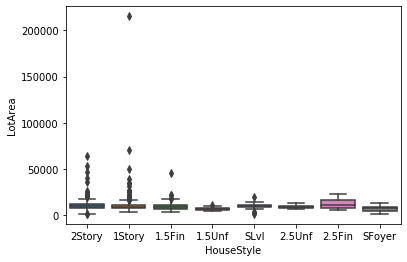

In [54]:
# 探索 HouseStyle 与 LotArea 之间的关系

# 箱体图
sns.boxplot(x='HouseStyle', y='LotArea', data=data)

***3.连续变量与连续变量 - 散点图，Hexbin图，联合图 ***

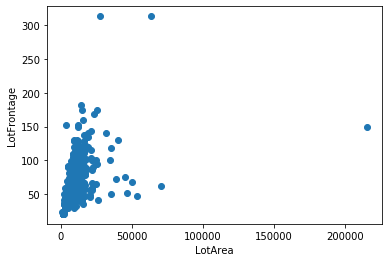

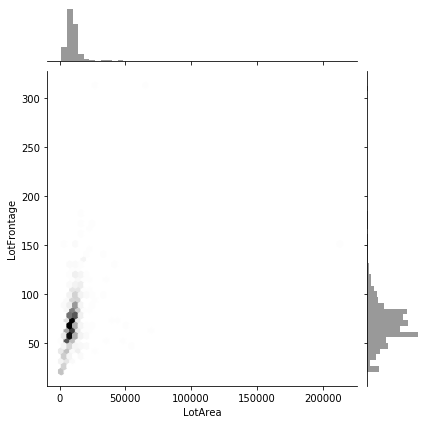

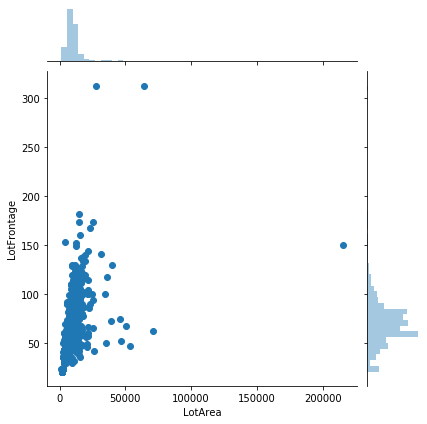

In [59]:
# 探索 LotArea 和 LotFrontage 之间关系

# 散点图
plt.scatter(data.LotArea, data.LotFrontage)
plt.xlabel('LotArea')
plt.ylabel('LotFrontage')

# Hexbin 图
sns.jointplot(x=data.LotArea, y=data.LotFrontage, kind='hex', color='k')

# 联合图
sns.jointplot(x='LotArea', y='LotFrontage', data=data[['LotArea', 'LotFrontage']])